# Face Deblurring

Trained an End-to-End model for deblurring of images (CelebA) following the work in CNN For Direct Text Deblurring, using Keras. The first layer filter size is adjusted to be approximately equal to the blur kernel size. Pre-Trained model with weights and some images from test set are uploaded.

**Importing Necessary Packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from skimage.io import imread
from glob import glob

In [2]:
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras import optimizer_v2
from keras.optimizer_v2 import adam
import keras.backend as K

**Loading Images**

In [4]:
import os
os.chdir("D:\MyLearnings\GIT and Github\Github Projects\Face-Blurring-and-Deblurring")

In [5]:
ls

 Volume in drive D is Work_HDD
 Volume Serial Number is 1A67-1BE0

 Directory of D:\MyLearnings\GIT and Github\Github Projects\Face-Blurring-and-Deblurring

26/08/2021  11:35 PM    <DIR>          .
26/08/2021  11:35 PM    <DIR>          ..
26/08/2021  11:35 PM    <DIR>          images
25/08/2021  05:45 PM             1,085 LICENSE
26/08/2021  11:29 PM    <DIR>          model
26/08/2021  11:28 PM                34 README.md
26/08/2021  11:38 PM               126 requirements.txt
               3 File(s)          1,245 bytes
               4 Dir(s)  440,933,851,136 bytes free


Only showing a small set of images from the local test set we generated.

Load input blurred images: 

In [8]:
clean_images_path = glob('D:\MyLearnings\GIT and Github\Github Projects\Face-Blurring-and-Deblurring/model/faceDeblurring/Images2/Clean Images/*.png')
blurry_images_path = glob('D:\MyLearnings\GIT and Github\Github Projects\Face-Blurring-and-Deblurring/model/faceDeblurring/Images2/Blurry Images/*.png')
Images = []; Blurry = []
for image, blurry in zip(clean_images_path, blurry_images_path):
    Images.append(imread(image))
    Blurry.append(imread(blurry))
Images = np.array(Images).astype('float32')
Blurry = np.array(Blurry).astype('float32')

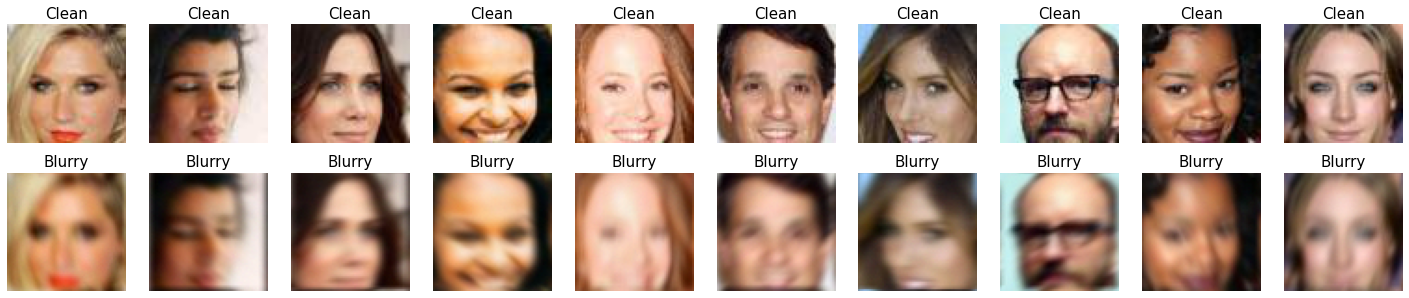

In [9]:
f, ax = plt.subplots(2,10,figsize=(25,5))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
plt.show()

**Defining CNN Model for Training Model**

The model has been trained on a much larger dataset of CelebA images.

In [10]:
deblur_CNN_input = Input(shape=(64,64,3))

#HIDDEN LAYERS
deblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(deblur_CNN_input)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer1)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer1)

deblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer1)
deblur_CNN_layer2 = BatchNormalization()(deblur_CNN_layer2)
deblur_CNN_layer2 = Activation('relu')(deblur_CNN_layer2)

deblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer2)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer3)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer3)

deblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer3)
deblur_CNN_layer4 = BatchNormalization()(deblur_CNN_layer4)
deblur_CNN_layer4 = Activation('relu')(deblur_CNN_layer4)

deblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer4)
deblur_CNN_layer5 = BatchNormalization()(deblur_CNN_layer5)
deblur_CNN_layer5 = Activation('relu')(deblur_CNN_layer5)

deblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer5)
deblur_CNN_layer6 = BatchNormalization()(deblur_CNN_layer6)
deblur_CNN_layer6 = Activation('relu')(deblur_CNN_layer6)

deblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer6)
deblur_CNN_layer7 = BatchNormalization()(deblur_CNN_layer7)
deblur_CNN_layer7 = Activation('relu')(deblur_CNN_layer7)

deblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer7)
deblur_CNN_layer8 = BatchNormalization()(deblur_CNN_layer8)
deblur_CNN_layer8 = Activation('relu')(deblur_CNN_layer8)

deblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer8)
deblur_CNN_layer9 = BatchNormalization()(deblur_CNN_layer9)
deblur_CNN_layer9 = Activation('relu')(deblur_CNN_layer9)

deblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer9)
deblur_CNN_layer10 = BatchNormalization()(deblur_CNN_layer10)
deblur_CNN_layer10 = Activation('relu')(deblur_CNN_layer10)

deblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer10)
deblur_CNN_layer11 = BatchNormalization()(deblur_CNN_layer11)
deblur_CNN_layer11 = Activation('relu')(deblur_CNN_layer11)

deblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer11)
deblur_CNN_layer12 = BatchNormalization()(deblur_CNN_layer12)
deblur_CNN_layer12 = Activation('relu')(deblur_CNN_layer12)

deblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer12)
deblur_CNN_layer13 = BatchNormalization()(deblur_CNN_layer13)
deblur_CNN_layer13 = Activation('relu')(deblur_CNN_layer13)

deblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(deblur_CNN_layer13)
deblur_CNN_layer14 = BatchNormalization()(deblur_CNN_layer14)
deblur_CNN_layer14 = Activation('relu')(deblur_CNN_layer14)

deblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN = Model(inputs= deblur_CNN_input, outputs=deblur_CNN_output )

In [11]:
deblur_CNN.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 128)       38528     
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 320)       41280     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 320)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 320)       0     

Load the weight file **celebA_deblur_cnn_weights.h5** here:

In [12]:
import keras
adam = keras.optimizer_v2.adam.Adam(learning_rate= 0.00001)
deblur_CNN.compile(optimizer= adam, loss= 'mean_squared_error')
deblur_CNN.load_weights('D:\MyLearnings\GIT and Github\Github Projects\Face-Blurring-and-Deblurring/model/faceDeblurring/celebA_deblur_cnn_weights.h5')

**Deblurred Faces**

Deblurred images as output: 

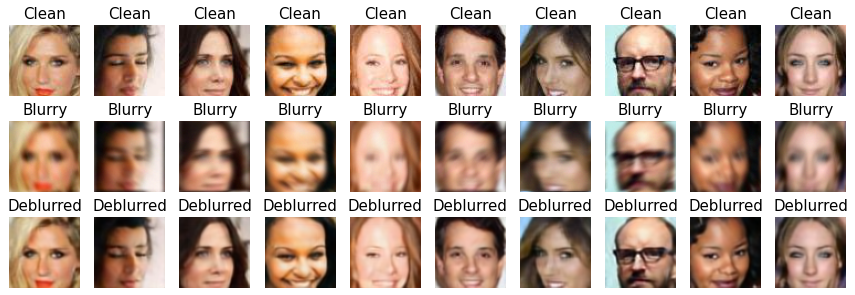

In [13]:
Deblurred = deblur_CNN.predict(Blurry)
Deblurred = np.clip(Deblurred, 0, 255)
f, ax = plt.subplots(3,10, figsize=(15,5))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
    ax[2,i].imshow(Deblurred[i].astype('uint8'));  ax[2,i].axis('Off'); ax[2,i].set_title('Deblurred', size=15)
plt.show()